<a href="https://colab.research.google.com/github/Najme-naseri/Image-Procssing/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import os
import cv2
import matplotlib.pyplot as plt
import random
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%ls

drive/  sample_data/


In [ ]:
images = os.listdir("/content/drive/MyDrive/data")

In [ ]:
print(len(images))
print(type(images))
print(images[0])

165
<class 'list'>
subject03.surprised


In [ ]:
path = "/content/drive/MyDrive/data/"
data_path = []
for img in images:
  data_path.append(os.path.join(path, img))

In [ ]:
print(len(data_path))
print(type(data_path))
print(data_path[0])

165
<class 'list'>
/content/drive/MyDrive/data/subject03.surprised


In [ ]:
training_faces = []
labels = []
for img in data_path:
  image = plt.imread(img, cv2.IMREAD_GRAYSCALE)
  resized_image = cv2.resize(image, (100, 100))
  flattened_image = resized_image.flatten()
  training_faces.append(flattened_image)

training_faces = np.array(training_faces)


In [ ]:
for file in images:
  label = int(file.split('.')[0].replace("subject", ""))
  labels.append(label)

labels = np.array(labels)

In [ ]:
print(len(labels))
print(type(labels))
print(labels[0])

165
<class 'numpy.ndarray'>
3


In [ ]:
# Step 3: Eigenface generation
pca = PCA(n_components=len(training_faces))
pca.fit(training_faces)

mean_face = pca.mean_
centered_faces = training_faces - mean_face
eigenfaces = pca.components_
training_features = pca.transform(centered_faces)

In [ ]:

# Step 5: Training
X_train, X_test, y_train, y_test = train_test_split(training_features, labels, test_size=0.2)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Step 6: Face detection
#test_face = preprocess_image(test_image)
#test_feature = np.dot(test_face - mean_face, selected_eigenfaces)

#prediction = clf.predict([test_feature])

#if prediction == face_label:
    #print("Face detected!")
#else:
   # print("No face detected.")


SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc * 100)

90.9090909090909


Model Guess is: [3]


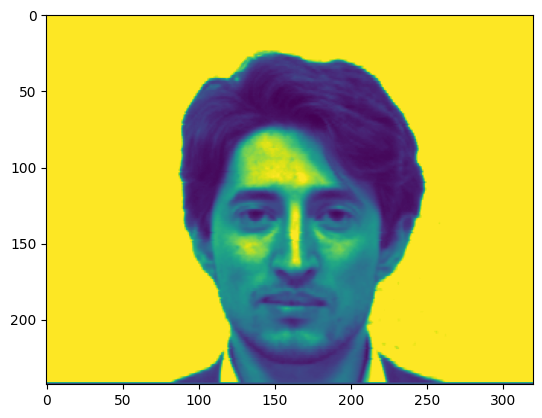

In [ ]:
test_image_path = os.path.join(path, "subject03.surprised")
test_image = plt.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
resized_test_image = cv2.resize(test_image, (100, 100))

flattened_test_image = resized_test_image.flatten()
test_face = flattened_test_image

test_feature = pca.transform(test_face.reshape(1, -1))
prediction = clf.predict(test_feature)

print("Model Guess is:", prediction)

guess_path = path + ("/subject" + str(prediction[0]).zfill(2) + '.normal')

guess_image = plt.imread(guess_path)

plt.imshow(guess_image)
plt.show()

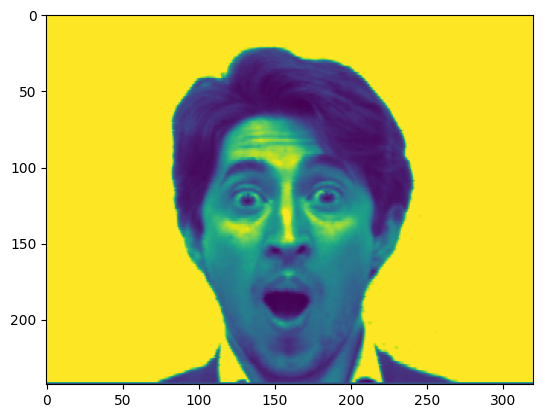

In [ ]:
plt.imshow(test_image)
plt.show()